In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# -------------------------------------------------------------------
# Memuat Data 
# -------------------------------------------------------------------

file_path = 'pagerank500_edges_pta.csv'
try:
    df = pd.read_csv(
        file_path,
        comment='#',
        sep=','  
    )
    
    print("Data berhasil dimuat. Berikut 5 baris pertama:")
    print(df.head())
    print("\nInfo DataFrame:")
    df.info()

except FileNotFoundError:
    print(f"Error: File '{file_path}' tidak ditemukan.")
except Exception as e:
    print(f"Terjadi error saat membaca file: {e}")


# -------------------------------------------------------------------
# Membuat Graf Penuh (untuk Analisis)
# -------------------------------------------------------------------
# buat graf berarah (DiGraph) dari DataFrame pandas
# -------------------------------------------------------------------

if 'df' in locals():
    G_full = nx.from_pandas_edgelist(
        df,
        source='Halaman Sumber',
        target='Link Keluar (Internal)',
        create_using=nx.DiGraph() # Penting: create_using=nx.DiGraph()
    )
    
    print("\n--- Informasi Graf Penuh ---")
    print(f"Jumlah Node (halaman): {G_full.number_of_nodes()}")
    print(f"Jumlah Edge (tautan): {G_full.number_of_edges()}")

# -------------------------------------------------------------------
# Membuat Subgraph (untuk Visualisasi)
# -------------------------------------------------------------------
# ambil 100 edge pertama dari data untuk digambar
# -------------------------------------------------------------------

if 'df' in locals():
    df_sample = df.head(100)
    G_sample = nx.from_pandas_edgelist(
        df_sample,
        source='Halaman Sumber',
        target='Link Keluar (Internal)',
        create_using=nx.DiGraph()
    )

    print("\n--- Informasi Subgraph (untuk Visualisasi) ---")
    print(f"Jumlah Node (sample): {G_sample.number_of_nodes()}")
    print(f"Jumlah Edge (sample): {G_sample.number_of_edges()}")

# -------------------------------------------------------------------
# Visualisasi Subgraph
# -------------------------------------------------------------------
# Menggambar G_sample (bukan G_full)
# -------------------------------------------------------------------

if 'G_sample' in locals():
    print("\nMembuat visualisasi subgraph...")
    
    # Mengatur ukuran gambar
    plt.figure(figsize=(15, 12))
    
    # Menentukan layout
    # 'spring_layout' adalah layout yang baik untuk graf umum
    # k=0.5 dan iterations=50 membantu 'menyebarkan' node
    pos = nx.spring_layout(G_sample, k=0.5, iterations=50, seed=42)
    
    # Menggambar graf
    nx.draw(
        G_sample,
        pos,
        with_labels=True,      # Tampilkan label (ID node)
        node_color='skyblue',  # Warna node
        node_size=800,         # Ukuran node
        font_size=9,           # Ukuran font label
        edge_color='gray',     # Warna edge
        arrows=True,           # Tampilkan panah (karena ini DiGraph)
        arrowstyle='-|>',      # Gaya panah
        arrowsize=15           # Ukuran panah
    )
    
    plt.title("Visualisasi Subgraph (100 Tautan Pertama)")
    
    # Menyimpan gambar ke file
    output_image_path = "subgraph.png"
    plt.savefig(output_image_path)
    
    print(f"Visualisasi subgraph telah disimpan ke '{output_image_path}'")
    
# -------------------------------------------------------------------
# Analisis Graf Penuh (Menghitung PageRank)
# -------------------------------------------------------------------
# gunakan graf penuh (G_full) untuk analisis
# -------------------------------------------------------------------

if 'G_full' in locals():
    print("\nMenghitung PageRank pada GRAF PENUH...")
    # Ini mungkin butuh beberapa detik
    pagerank_scores = nx.pagerank(G_full, alpha=0.85)
    
    # Mengurutkan node berdasarkan skor PageRank
    sorted_pagerank = sorted(pagerank_scores.items(), key=lambda item: item[1], reverse=True)
    
    print("\n--- 5 Node Teratas Berdasarkan PageRank ---")
    for i, (node, score) in enumerate(sorted_pagerank[:5]):
        print(f"{i+1}. Node {node}: {score:.8f}")

    # Variabel baru untuk menyimpan ID node teratas
    top_node_id = None
    if sorted_pagerank:
        top_node_id = sorted_pagerank[0][0]
        print(f"\nNode teratas adalah: {top_node_id}")

# -------------------------------------------------------------------
# Analisis Pengikut (In-Degree) dan Diikuti (Out-Degree)
# -------------------------------------------------------------------

    print("\nMenghitung Jumlah Pengikut (In-Degree) dan Diikuti (Out-Degree)...")
    
    # Menghitung in-degree (link masuk / pengikut)
    # Ini adalah DegreeView: (node, jumlah_pengikut)
    in_degrees = G_full.in_degree()
    
    # Menghitung out-degree (link keluar / diikuti)
    # Ini adalah DegreeView: (node, jumlah_diikuti)
    out_degrees = G_full.out_degree()
    
    # Mengurutkan berdasarkan 'Pengikut' (In-Degree) terbanyak
    sorted_in_degree = sorted(in_degrees, key=lambda item: item[1], reverse=True)
    
    # Mengurutkan berdasarkan 'Diikuti' (Out-Degree) terbanyak
    sorted_out_degree = sorted(out_degrees, key=lambda item: item[1], reverse=True)
    
    print("\n--- 5 Node Teratas Berdasarkan Jumlah Pengikut (In-Degree) ---")
    print("(Node yang paling banyak di-link oleh halaman lain)")
    for i, (node, degree) in enumerate(sorted_in_degree[:5]):
        print(f"{i+1}. Node {node}: {degree} pengikut")
        
    print("\n--- 5 Node Teratas Berdasarkan Jumlah Diikuti (Out-Degree) ---")
    print("(Node yang paling banyak me-link ke halaman lain)")
    for i, (node, degree) in enumerate(sorted_out_degree[:5]):
        print(f"{i+1}. Node {node}: mengikuti {degree} halaman")
    
    # Menampilkan info untuk node teratas dari PageRank (jika ada)
    if top_node_id is not None:
        print(f"\n--- Analisis Detail Node PageRank Teratas (Node {top_node_id}) ---")
        # G_full.in_degree(node) mengambil nilai spesifik untuk node itu
        print(f"Jumlah Pengikut (In-Degree): {G_full.in_degree(top_node_id)}")
        print(f"Jumlah Diikuti (Out-Degree): {G_full.out_degree(top_node_id)}")

ModuleNotFoundError: No module named 'networkx'


--- Menganalisis Koneksi untuk Node Teratas (https://pta.trunojoyo.ac.id/) ---

Jumlah 'Pengikut' (Predecessors): 496
Daftar Pengikut: ['https://pta.trunojoyo.ac.id/', 'https://pta.trunojoyo.ac.id/c_search/', 'https://pta.trunojoyo.ac.id/c_template/', 'https://pta.trunojoyo.ac.id/c_contact/', 'https://pta.trunojoyo.ac.id/welcome/detail/170361100003', 'https://pta.trunojoyo.ac.id/welcome/detail/170111100053', 'https://pta.trunojoyo.ac.id/welcome/detail/160211100116', 'https://pta.trunojoyo.ac.id/welcome/index/2', 'https://pta.trunojoyo.ac.id/welcome/index/3', 'https://pta.trunojoyo.ac.id/welcome/index/4893', 'https://pta.trunojoyo.ac.id/c_search/byfac/1', 'https://pta.trunojoyo.ac.id/c_search/byprod/1', 'https://pta.trunojoyo.ac.id/c_search/byprod/24', 'https://pta.trunojoyo.ac.id/c_search/byfac/2', 'https://pta.trunojoyo.ac.id/c_search/byprod/2', 'https://pta.trunojoyo.ac.id/c_search/byprod/3', 'https://pta.trunojoyo.ac.id/c_search/byprod/4', 'https://pta.trunojoyo.ac.id/c_search/bypr

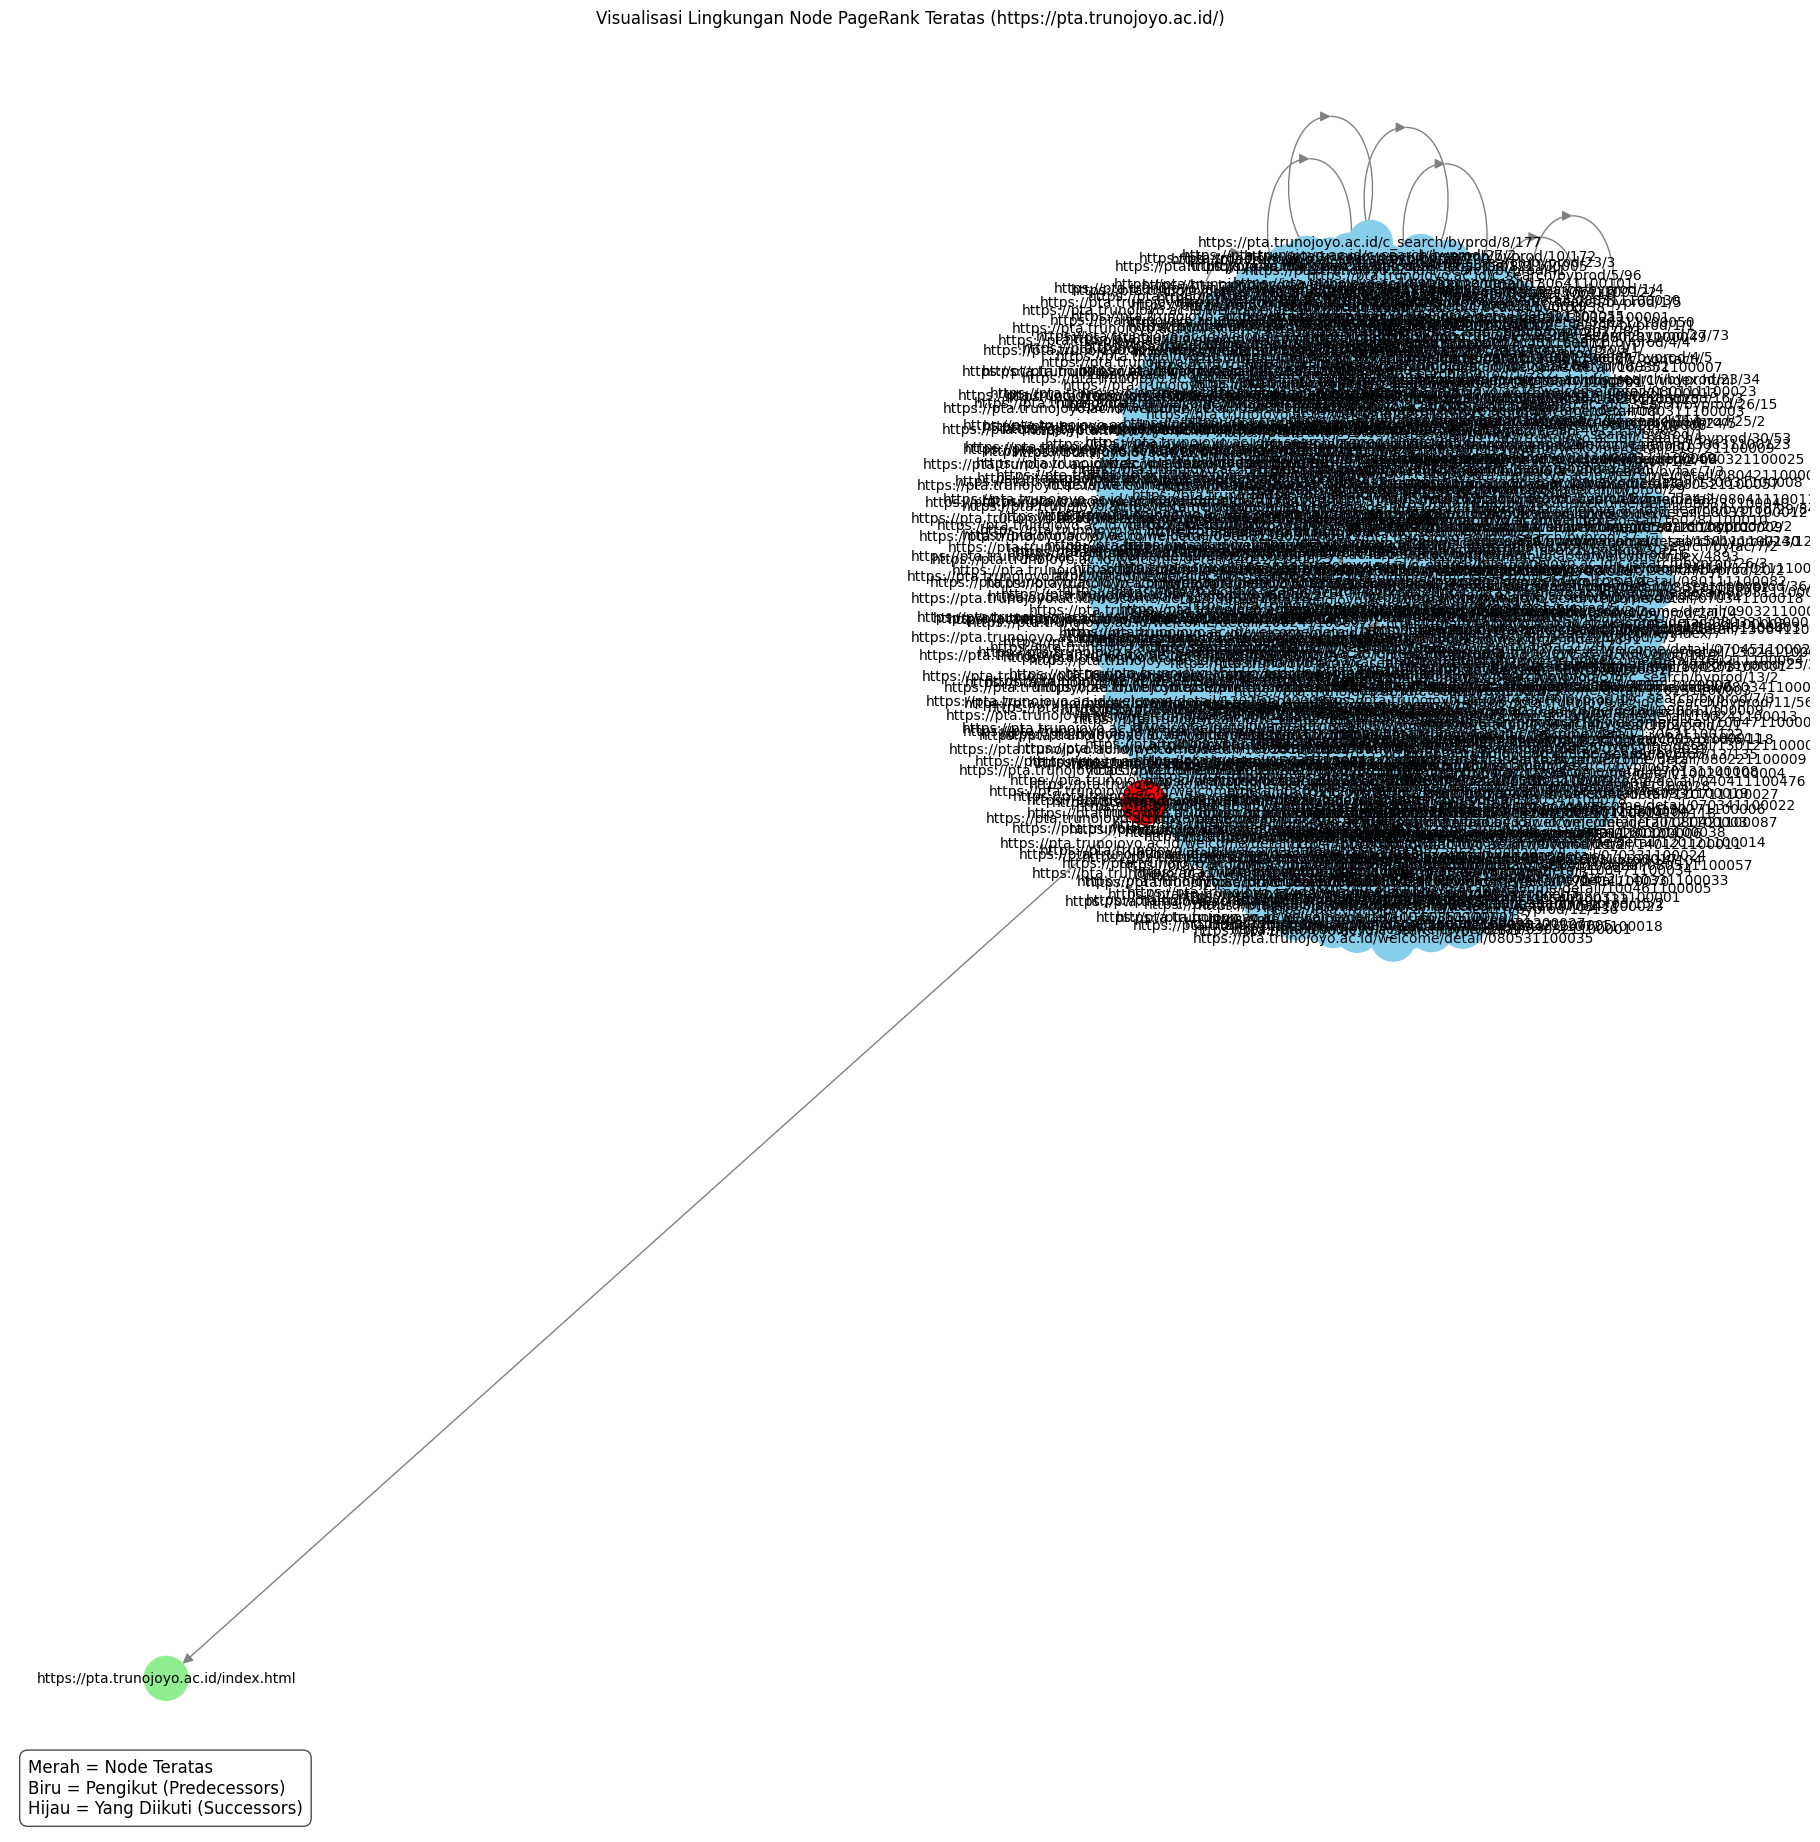

In [2]:
# -------------------------------------------------------------------
# Analisis Koneksi Node Teratas
# -------------------------------------------------------------------
# Menampilkan node yang terhubung KE dan DARI node teratas
# -------------------------------------------------------------------

if 'top_node_id' in locals() and top_node_id is not None:
    print(f"\n--- Menganalisis Koneksi untuk Node Teratas ({top_node_id}) ---")

    # Predecessors = Node yang menaut KE top_node_id (Pengikut/Fans)
    # Ini adalah node-node yang "memberikan suara" PageRank-nya
    predecessors = list(G_full.predecessors(top_node_id))
    print(f"\nJumlah 'Pengikut' (Predecessors): {len(predecessors)}")
    print(f"Daftar Pengikut: {predecessors}")

    # Successors = Node yang DITAUT oleh top_node_id (Yang Diikuti)
    # Ini adalah node-node ke mana top_node_id "memberikan suaranya"
    successors = list(G_full.successors(top_node_id))
    print(f"\nJumlah 'Yang Diikuti' (Successors): {len(successors)}")
    print(f"Daftar Yang Diikuti: {successors}")
    
    # Menyimpan daftar node ini untuk visualisasi
    nodes_to_visualize = set(predecessors + successors + [top_node_id])
    print(f"\nTotal node unik untuk divisualisasikan: {len(nodes_to_visualize)}")

# -------------------------------------------------------------------
# Visualisasi Lingkungan Node Teratas
# -------------------------------------------------------------------
# Membuat subgraph khusus untuk node teratas dan koneksinya
# -------------------------------------------------------------------

if 'nodes_to_visualize' in locals() and nodes_to_visualize:
    print("\nMembuat visualisasi untuk lingkungan node teratas...")
    
    # Membuat subgraph HANYA dari node yang relevan
    H = G_full.subgraph(nodes_to_visualize)
    
    plt.figure(figsize=(18, 18))
    
    # Membuat layout
    pos = nx.spring_layout(H, k=0.3, iterations=50, seed=42)
    
    # Membuat peta warna untuk menyorot node
    color_map = []
    for node in H:
        if node == top_node_id:
            color_map.append('red')      # Node Teratas = Merah
        elif node in predecessors:
            color_map.append('skyblue')  # Pengikut = Biru
        elif node in successors:
            color_map.append('lightgreen') # Yang Diikuti = Hijau
        else:
            color_map.append('gray') # (Seharusnya tidak terjadi)

    print(f"Menggambar graf dengan {H.number_of_nodes()} node dan {H.number_of_edges()} edge.")

    nx.draw(
        H,
        pos,
        node_color=color_map,
        with_labels=True,
        node_size=1000,
        font_size=10,
        font_color='black',
        edge_color='gray',
        arrows=True,
        arrowsize=15
    )
    
    plt.title(f"Visualisasi Lingkungan Node PageRank Teratas ({top_node_id})")
    
    # Menambahkan legenda sederhana
    plt.text(0.01, 0.01, 'Merah = Node Teratas\nBiru = Pengikut (Predecessors)\nHijau = Yang Diikuti (Successors)',
             transform=plt.gca().transAxes, fontsize=12,
             bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.7))
    
    # Menyimpan gambar ke file
    output_image_path_top = "top_pagerank_node_graph.png"
    plt.savefig(output_image_path_top)
    
    print(f"Visualisasi node teratas telah disimpan ke '{output_image_path_top}'")